# Question 5

### part a:
implementation of naive bayes classifier without library:

In [2]:
import numpy as np
import pandas as pd
import math

class NBGuassianClf:
    def separate_by_classes(self, X, y):
        #first get type of classes
        self.classes = np.unique(y)
        subdatasets = {}
        
        #here get classes and count of samples in each class
        cls, counts = np.unique(y, return_counts=True)
        self.class_freq = dict(zip(cls, counts))
        
        #get number of features
        self.features = X.shape[1]
        
        #get number of data in the sample
        sum_freq = X.shape[0]
        
        #here seperate each data by its class
        for cls in self.classes:
            indexes = np.argwhere(y==cls)
            subdatasets[cls] = X[indexes, :]
            self.class_freq[cls] = self.class_freq[cls]/sum_freq
            
        return subdatasets
    
    def fit(self, X, y):
        separated_X = self.separate_by_classes(X, y)
        self.mean = {}
        self.std = {}
        
        #here we calculate mean and std of each class 
        #because we need it to calculate probability of test data when we want to predict its class
        for class_type in self.classes:
            self.mean[class_type] = np.mean(separated_X[class_type], axis=0)[0]
            self.std[class_type] = np.std(separated_X[class_type], axis=0)[0]
            
    #it is based on the formula of guassian pdf
    def calculate_probability(self, x, mean, stdev):
        exponent = math.exp(-((x - mean) ** 2 / (2 * stdev ** 2)))
        return (1 / (math.sqrt(2 * math.pi) * stdev)) * exponent
    
    def predict_proba(self, X):
        self.class_prob = {cls: math.log(self.class_freq[cls], math.e) for cls in self.classes}
        #calculate probibability of each class for the X given
        for cls in self.classes:
            for i in range(self.features):
                self.class_prob[cls]+=math.log(self.calculate_probability(X[i], self.mean[cls][i], self.std[cls][i]), math.e)
        self.class_prob = {cls: math.e ** self.class_prob[cls] for cls in self.class_prob}
        return self.class_prob
    
    
    def predict(self, X):
        pred = []
        for x in X:
            pred_class = None
            max_prob = 0
            #for each class calculate probibability and compare which one is bigger and assign the class to it
            for cls, prob in self.predict_proba(x).items():
                if prob>max_prob:
                    max_prob = prob
                    pred_class = cls
            pred.append(pred_class)
        return pred

### part b:

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import seaborn as sns; sns.set()

In [4]:
df = pd.read_csv('Data/Breast_cancer_data.csv')
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [5]:
X = df[['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness']]
y = df['diagnosis']

#split data to test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

In [20]:
clf = NBGuassianClf()

#fit train data
clf.fit(np.array(X_train), np.array(y_train))

#predict class of test data
y_pred = clf.predict(np.array(X_test))

<AxesSubplot:>

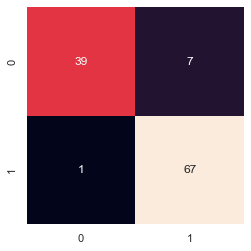

In [21]:
confusion_mtx = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_mtx, square=True, annot=True, fmt='d', cbar=False)

In [22]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

In [23]:
print(f"accuracy = {accuracy}")
print(f"recall = {recall}")
print(f"precision = {precision}")

accuracy = 0.9298245614035088
recall = 0.9852941176470589
precision = 0.9054054054054054


### part c:
implementation with library:

In [24]:
from sklearn.naive_bayes import GaussianNB   

clf2 = GaussianNB()

# I use the X_train, X_test, y_train, y_test from previous part
#fit train data
clf2.fit(X_train, y_train)

#train test data
y_pred2 = clf2.predict(np.array(X_test))

C:\Users\Rayan\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


<AxesSubplot:>

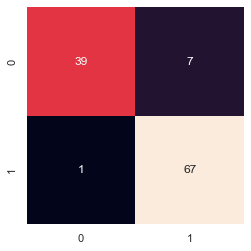

In [25]:
confusion_mtx = confusion_matrix(y_test, y_pred2)
sns.heatmap(confusion_mtx, square=True, annot=True, fmt='d', cbar=False)

In [26]:
accuracy2 = accuracy_score(y_test, y_pred2)
recall2 = recall_score(y_test, y_pred2)
precision2 = precision_score(y_test, y_pred2)

In [27]:
print(f"accuracy = {accuracy2}")
print(f"recall = {recall2}")
print(f"precision = {precision2}")

accuracy = 0.9298245614035088
recall = 0.9852941176470589
precision = 0.9054054054054054


# Question 6

In [40]:
# !pip install scipy

In [41]:
# !pip install Pillow

In [30]:
from PIL import Image
from scipy import misc
import os
from os import listdir
import math

In [31]:
#This function calculate average color (r, g, b) of image given. 
def compute_average_image_color(img):
    width, height = img.size

    r_total = 0
    g_total = 0
    b_total = 0

    count = 0
    for x in range(0, width):
        for y in range(0, height):
            r, g, b = img.getpixel((x,y))
            r_total += r
            g_total += g
            b_total += b
            count += 1

    return (r_total/count, g_total/count, b_total/count)

In [32]:
folder_dir = "/Users/Rayan/Documents/011/ML/ML_HW1/Data/image/Images"
img_data = []

#here the loop walks throw of the folder path given
for images in os.listdir(folder_dir):
    #open the image
    img = Image.open(folder_dir + "/" + images)
    
    #get average color of image
    cl = list(compute_average_image_color(img))
    
    #getting class of image by first character of its name
    if images[0] == 'c':
        cl.append(0)
    else:
        cl.append(1)
    
    #add the processed image to the list
    img_data.append(cl)

#convert list to DataFrame
img_data = pd.DataFrame(img_data, columns=["r", "g", "b", "class"])

In [33]:
img_data

,r,g,b,class
0,99.266885,113.613790,146.868117,0
1,171.014902,172.718215,188.230243,0
2,45.925127,44.929975,50.240636,0
3,81.871091,103.768452,93.945119,0
4,95.688082,96.276187,77.863994,0
...,...,...,...,...
117,90.832776,51.836400,49.742772,1
118,164.051626,98.921054,101.093162,1
119,96.540052,78.758812,52.770046,1
120,106.566972,77.443221,71.207838,1


In [34]:
def my_classification(X):
    chelsea_blue = [0, 20, 137] # class = 0
    manutd_red = [199, 1, 2] # class = 1
    pred = []
    for x in X:
        pred_class = None
        
        #calculate distance from each color. 
        dist0 = sum((x - chelsea_blue) ** 2)
        dist1 = sum((x - manutd_red) ** 2)
        
        #minimum distance determines the class of the x
        if dist0<dist1:
            pred_class = 0
        else:
            pred_class = 1
        pred.append(pred_class)
    return pred

In [35]:
X = np.array(img_data[['r', 'g', 'b']])
y = np.array(img_data['class'])

In [36]:
y_pred = my_classification(X)

<AxesSubplot:>

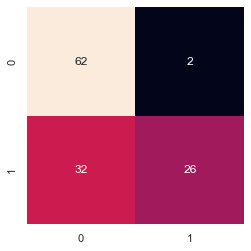

In [37]:
confusion_mtx = confusion_matrix(y, y_pred)
sns.heatmap(confusion_mtx, square=True, annot=True, fmt='d', cbar=False)

In [38]:
accuracy = accuracy_score(y, y_pred)
recall = recall_score(y, y_pred)
precision = precision_score(y, y_pred)

In [39]:
print(f"accuracy = {accuracy}")
print(f"recall = {recall}")
print(f"precision = {precision}")

accuracy = 0.7213114754098361
recall = 0.4482758620689655
precision = 0.9285714285714286
